<a class="anchor" id="0"></a>
# K-Means Clustering

**K-Means clustering** is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, I implement K-Means clustering to find intrinsic groups within the dataset that display the same `status_type` behaviour. The `status_type` behaviour variable consists of posts of a different nature (video, photos, statuses and links).


So, let's get started.

# **1. Introduction to K-Means Clustering** <a class="anchor" id="1"></a>

Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

**K-Means clustering** is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

K-Means clustering can be represented diagrammatically as follows:-


## K-Means

![K-Means](https://miro.medium.com/max/2160/1*tWaaZX75oumVwBMcKN-eHA.png)

# **2. Applications of clustering** <a class="anchor" id="2"></a>


- K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

  1. Image segmentation

  2. Customer segmentation

  3. Species clustering

  4. Anomaly detection

  5. Clustering languages

# **3. K-Means Clustering intuition** <a class="anchor" id="3"></a>


K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.


**Centroid** - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.
K-Means clustering works as follows:-
The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-


## **3.1 Data assignment step**


Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.



## **3.2 Centroid update step**


In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.


The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached.
This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

The K-Means intuition can be represented with the help of following diagram:-


## K-Means intuition
![K-Means intuition](https://i.ytimg.com/vi/_aWzGGNrcic/hqdefault.jpg)

# **4. Choosing the value of K** <a class="anchor" id="4"></a>


The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the **elbow method** which is described below.


# **5. The elbow method** <a class="anchor" id="5"></a>


The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. The below diagram shows how the elbow method works:-

## The elbow method

![Elbow method in K-Means](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png)

We can see that if K increases, average distortion will decrease.  Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
#data = '/content/Live.csv'

df = pd.read_csv('C:/Users/Mgama/Ai_Amit_Diploma/Learning_Amit/Live.csv')


# **8. Exploratory data analysis** <a class="anchor" id="8"></a>


In [52]:
df.shape

(7050, 16)

In [53]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [55]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [56]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [58]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [59]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [60]:
len(df['status_id'].unique())

6997

In [61]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [62]:
len(df['status_published'].unique())

6913

### Explore `status_type` variable

In [63]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [64]:
len(df['status_type'].unique())

4

In [65]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [67]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [68]:
X = df.drop('status_type', axis=1)
y = df['status_type']

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

y = le.transform(y)

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


In [71]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


# **11. Feature Scaling** <a class="anchor" id="11"></a>


In [72]:
cols = X.columns

In [73]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [74]:
X = pd.DataFrame(X, columns=[cols])

In [75]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [77]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as **inertia**, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.


- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster **centroids**.


- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

### Inertia


- **Inertia** is not a normalized metric.

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of `curse of dimensionality`).

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can calculate model inertia as follows:-

In [78]:
kmeans.inertia_

99.50082638379922

In [79]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


Result: 275 out of 7050 samples were correctly labeled.


In [80]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.04


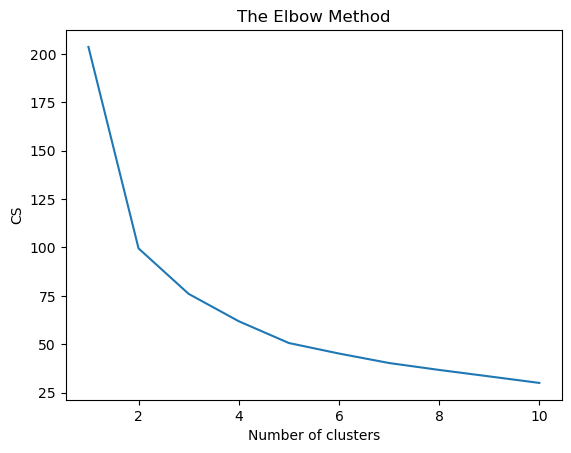

In [81]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 275 out of 7050 samples were correctly labeled.
Accuracy score: 0.04


### K-Means model with 3 clusters

In [83]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 507 out of 7050 samples were correctly labeled.
Accuracy score: 0.07


### K-Means model with 4 clusters

In [84]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 322 out of 7050 samples were correctly labeled.
Accuracy score: 0.05


In [85]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [86]:
X = df.drop('status_type', axis=1)
true_labels = df['status_type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
dbscan = DBSCAN(eps=1, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)
print("Noise percentage:", f"{(n_noise/len(clusters)*100):.1f}%")

Clusters found: 13
Noise points: 383
Noise percentage: 5.4%


In [88]:
if n_clusters > 1:
    score = silhouette_score(X_scaled, clusters)
    print("Silhouette Score:", f"{score:.3f}")
else:
    print("Only one cluster found")

print("\nTrue labels distribution:")
print(true_labels.value_counts())
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

Silhouette Score: 0.487

True labels distribution:
1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

Cluster distribution:
-1      383
 0     6438
 1      171
 2        4
 3        5
 4        4
 5        7
 6        5
 7        5
 8        5
 9        7
 10       4
 11       6
 12       6
dtype: int64


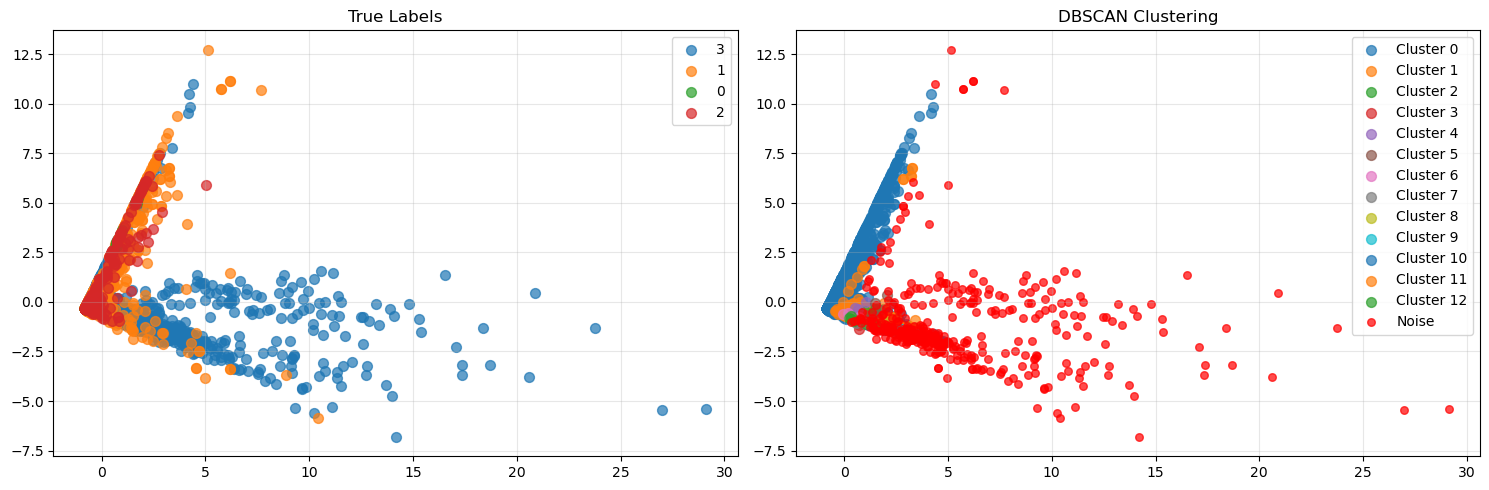

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for label in true_labels.unique():
    mask = true_labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label, alpha=0.7, s=50)
plt.title('True Labels')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for cluster_id in set(clusters):
    if cluster_id == -1:
        color = 'red'
        label = 'Noise'
        size = 30
    else:
        color = f'C{cluster_id}'
        label = f'Cluster {cluster_id}'
        size = 50

    mask = clusters == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=color, label=label, alpha=0.7, s=size)

plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [90]:
cross_table = pd.crosstab(true_labels, clusters,
                         rownames=['True Label'],
                         colnames=['Cluster'])

print("Comparison Table:")
print(cross_table)

Comparison Table:
Cluster     -1     0    1    2    3    4    5    6    7    8    9    10   11  \
True Label                                                                     
0             0    63    0    0    0    0    0    0    0    0    0    0    0   
1            53  4194   11    0    3    4    6    3    4    0    0    0    6   
2             9   350    3    0    2    0    0    0    1    0    0    0    0   
3           321  1831  157    4    0    0    1    2    0    5    7    4    0   

Cluster      12  
True Label       
0             0  
1             4  
2             0  
3             2  


In [91]:
print("Testing different parameters:")

eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]

for eps in eps_values:
    dbscan_test = DBSCAN(eps=eps, min_samples=5)
    clusters_test = dbscan_test.fit_predict(X_scaled)

    n_clusters_test = len(set(clusters_test)) - (1 if -1 in clusters_test else 0)
    n_noise_test = list(clusters_test).count(-1)

    if n_clusters_test > 1:
        score_test = silhouette_score(X_scaled, clusters_test)
        score_str = f"{score_test:.3f}"
    else:
        score_str = "N/A"

    print(f"eps={eps}: clusters={n_clusters_test}, noise={n_noise_test}, score={score_str}")

Testing different parameters:
eps=0.5: clusters=12, noise=814, score=0.026
eps=1.0: clusters=11, noise=404, score=0.491
eps=1.5: clusters=1, noise=272, score=N/A
eps=2.0: clusters=1, noise=177, score=N/A
eps=2.5: clusters=5, noise=133, score=0.784


In [92]:
if n_noise > 0:
    noise_data = df[clusters == -1]
    print(f"Noise points analysis ({len(noise_data)} points):")
    print("True labels in noise:")
    print(noise_data['status_type'].value_counts())
else:
    print("No noise points detected")

Noise points analysis (383 points):
True labels in noise:
3    321
1     53
2      9
Name: status_type, dtype: int64


In [93]:
print("=" * 40)
print("FINAL RESULTS")
print("=" * 40)
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")
print(f"Noise percentage: {(n_noise/len(clusters)*100):.1f}%")

if n_clusters > 1:
    print(f"Quality score: {silhouette_score(X_scaled, clusters):.3f}")

print("\nDBSCAN advantages:")
print("- No need to specify cluster count")
print("- Automatic noise detection")
print("- Works with non-spherical clusters")

FINAL RESULTS
Clusters found: 13
Noise points: 383
Noise percentage: 5.4%
Quality score: 0.487

DBSCAN advantages:
- No need to specify cluster count
- Automatic noise detection
- Works with non-spherical clusters
